# 2022 Divison I-FBS Season Analysis
###### Data obtained from Kaggle: https://www.kaggle.com/datasets/jeffgallini/college-football-team-stats-2019
###### Origin of Kaggle dataset is the NCAA FBS Stats webpage: https://www.ncaa.com/stats/football/fbs


In [1]:
import os
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import style
from scipy import stats
plt.style.use('seaborn-poster')

In [2]:
# Load the csv file
df = pd.read_csv("cfb22.csv")

# The csv file does not contain winning percentage, a statistic that I would like to work with
df["Win %"] = (df["Win"] / df ["Games"]) * 100
df

,Off Rank,TeamID,Team,Games,Win,Loss,Off Plays,Off Yards,Off Yards/Play,Off TDs,...,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown_y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Win %
0,59,2005.png,Air Force (Mountain West),13,10,3,889,5163,5.81,45,...,49,7,9,16,11,2,13,3,0.23,76.923077
1,80,2006.png,Akron (MAC),12,2,10,875,4472,5.11,31,...,129,4,9,13,14,12,26,-13,-1.08,16.666667
2,11,333.png,Alabama (SEC),13,11,2,896,6202,6.92,63,...,80,7,7,14,8,8,16,-2,-0.15,84.615385
3,26,2026.png,App State (Sun Belt),12,6,6,833,5464,6.56,55,...,16,13,7,20,5,6,11,9,0.75,50.000000
4,20,12.png,Arizona (Pac-12),12,5,7,811,5543,6.83,45,...,109,12,3,15,8,13,21,-6,-0.50,41.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,57,277.png,West Virginia (Big 12),12,5,7,870,4788,5.50,44,...,119,6,4,10,6,12,18,-8,-0.67,41.666667
127,7,98.png,Western Ky. (C-USA),14,9,5,1037,6962,6.71,58,...,17,13,19,32,10,12,22,10,0.71,64.285714
128,125,2711.png,Western Mich. (MAC),12,5,7,800,3623,4.53,24,...,38,14,11,25,8,13,21,4,0.33,41.666667
129,91,275.png,Wisconsin (Big Ten),13,7,6,827,4727,5.72,42,...,54,3,17,20,7,11,18,2,0.15,53.846154


## Offense Ranking vs. Winning Percentage

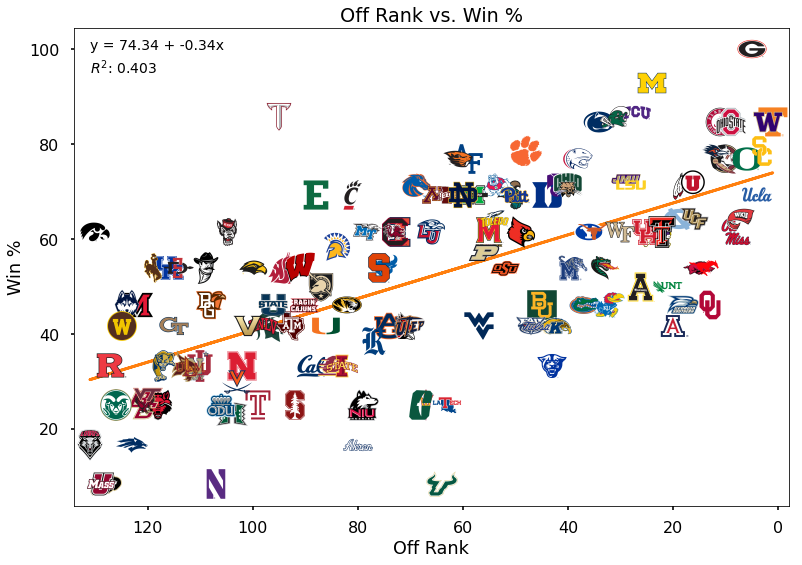

In [3]:
# Variables to analyze
x_column = "Off Rank"
y_column = "Win %"


def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

folder_path = 'logos'


# Extract the image file names from the "TeamID" column
image_files = [os.path.join(folder_path, filename) for filename in df['TeamID']]

x = df[x_column].to_numpy()
y = df[y_column].to_numpy()

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Calculate R-squared
r_squared = r_value ** 2


fig, ax = plt.subplots()
ax.scatter(x, y, color="white")
plt.xlim(max(x+3), min(x-3))
ax.text(max(x), max(y), 'y = ' + '{:.2f}'.format(intercept) + ' + {:.2f}'.format(slope) + 'x', size=14)
ax.text(max(x), max(y)-5, '$R^{2}$: ' + '{:.3f}'.format(r_squared), size=14)
ax.plot(x, intercept + slope * x, color='C1')
ax.set_title(x_column + " vs. " + y_column)
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

for x0, y0, path in zip(x, y, image_files):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.show()

### This plot illustrates a point that is obvious to many college football fans, a better offense leads to more wins.
#### The National Champion Georgia Bulldogs (15-0) had one of the best offenses.
### There are some interesting points. 
##### Iowa had one of the worst offenses in the country, yet still went a respectable 8-5. 
##### South Florida had an average offense, yet had a putrid 1-11 record. Their sole win was against FCS opponent Howard.
# 

## Defense Ranking vs. Winning Percentage

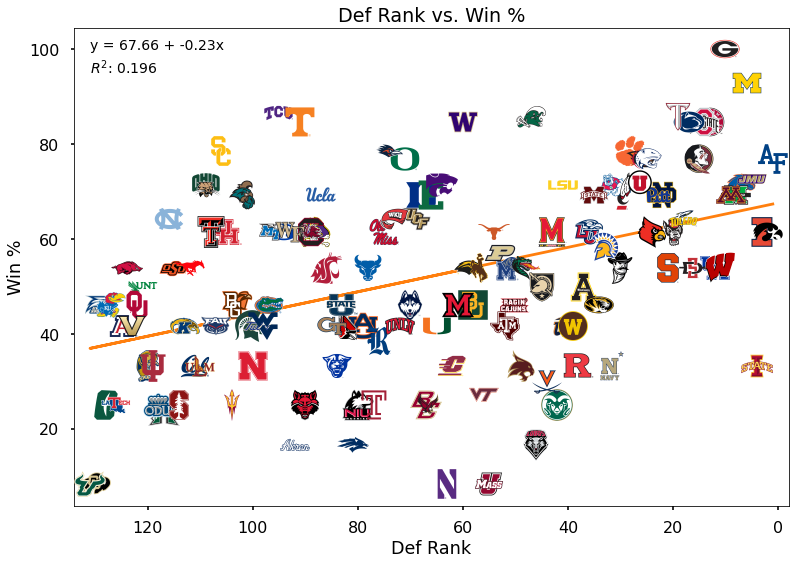

In [4]:
# Variables to analyze
x_column = "Def Rank"
y_column = "Win %"


def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

folder_path = 'logos'


# Extract the image file names from the "TeamID" column
image_files = [os.path.join(folder_path, filename) for filename in df['TeamID']]

x = df[x_column].to_numpy()
y = df[y_column].to_numpy()

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Calculate R-squared
r_squared = r_value ** 2


fig, ax = plt.subplots()
ax.scatter(x, y, color="white")
plt.xlim(max(x+3), min(x-3))
ax.text(max(x), max(y), 'y = ' + '{:.2f}'.format(intercept) + ' + {:.2f}'.format(slope) + 'x', size=14)
ax.text(max(x), max(y)-5, '$R^{2}$: ' + '{:.3f}'.format(r_squared), size=14)
ax.plot(x, intercept + slope * x, color='C1')
ax.set_title(x_column + " vs. " + y_column)
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

for x0, y0, path in zip(x, y, image_files):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.show()

### Defense matters, but maybe not as much as offense
#### The National Champion Georgia Bulldogs (15-0) had one of the best defenses.
#### So did playoff participants Michigan and Ohio State
### There are some interesting points. 
##### TCU and Tennessee had below average defenses, yet were near the top of the Big12 and SEC respectively.
##### TCU even made it to the National Championship, however the defense fell apart in a 65-7 thumping
##### Northwestern and UMass had above average defenses, yet both had abysmal 1-11 records
##### Remember USF? Their dismal defense helps to explain their 1-11 record
# 

## Combined Ranking vs. Winning Percentage
#### Here, a statistic called "Combined Ranking" is created which averages together a team's Offense Ranking and Defense Ranking

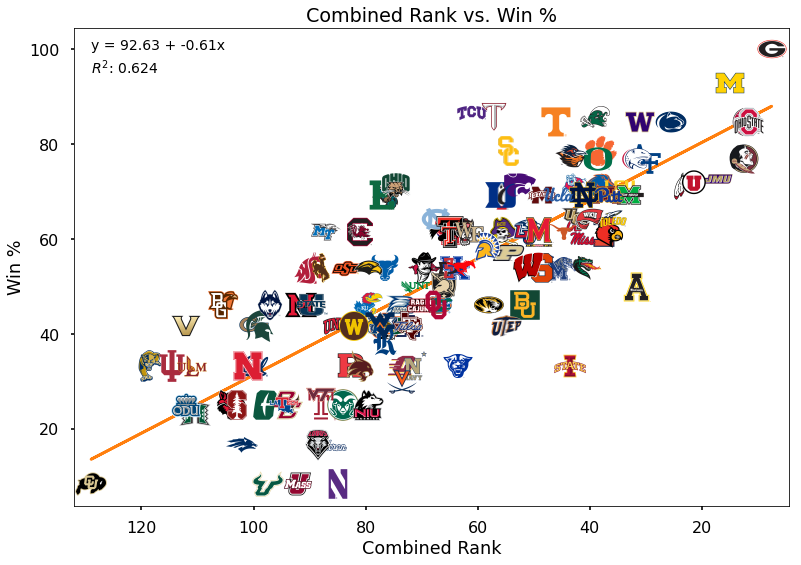

In [6]:
# Create "Combined Rank"
df["Combined Rank"] = (df["Off Rank"] + df["Def Rank"]) / 2

# Variables to analyze
x_column = "Combined Rank"
y_column = "Win %"


def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

folder_path = 'logos'


# Extract the image file names from the "TeamID" column
image_files = [os.path.join(folder_path, filename) for filename in df['TeamID']]

x = df[x_column].to_numpy()
y = df[y_column].to_numpy()

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Calculate R-squared
r_squared = r_value ** 2


fig, ax = plt.subplots()
ax.scatter(x, y, color="white")
plt.xlim(max(x+3), min(x-3))
ax.text(max(x), max(y), 'y = ' + '{:.2f}'.format(intercept) + ' + {:.2f}'.format(slope) + 'x', size=14)
ax.text(max(x), max(y)-5, '$R^{2}$: ' + '{:.3f}'.format(r_squared), size=14)
ax.plot(x, intercept + slope * x, color='C1')
ax.set_title(x_column + " vs. " + y_column)
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

for x0, y0, path in zip(x, y, image_files):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.show()

#### The National Champion Georgia Bulldogs (15-0) have the best Combined Ranking
#### Ohio State had the 2nd Combined Ranking spot -- supporting the opinion of some that the Peach Bowl between Georgia and Ohio State was the "real" national championship game.

### There are some interesting points. 
##### Florida State had the 4th Combined Ranking spot in the 2022 season. Does this mean that the pre-season hype for 2023 is warranted?
##### Don't tell Nick Saban, but his 11-2 Alabama team held the 3rd Combined Ranking Spot. He would argue that this is further evidence that they should have been included in the playoff.
##### Northwestern's Combined Ranking is bad, but it is not 1-11 bad. A bowl bid is possible in 2023.
##### As indicated by the Combined Ranking, Colorado was the worst team in 2022 by far. Getting a bowl bid would be an amazing accomplishment for the Buffs and first year HC Deion Sanders in 2023.
#### The Combined Ranking does not include special teams, as the NCAA does not provide a singular "Special Teams Rank" statistic. Poor special teams play can explain why some teams underperform.
# 

In [19]:
df[['Team','Combined Rank']].sort_values(by=['Combined Rank']).reset_index()

,index,Team,Combined Rank
0,34,Georgia (SEC),7.5
1,77,Ohio St. (Big Ten),11.5
2,2,Alabama (SEC),12.0
3,31,Florida St. (ACC),12.5
4,59,Michigan (Big Ten),15.0
...,...,...,...
126,120,Vanderbilt (SEC),112.0
127,80,Old Dominion (Sun Belt),112.0
128,40,Indiana (Big Ten),114.5
129,28,FIU (C-USA),118.5
